# Correlation Analysis: News Sentiment vs Stock Price Movement

This notebook explores the relationship between news sentiment and stock price movements by:
1. Aligning news and stock price data by date
2. Performing sentiment analysis on news headlines 
3. Calculating daily stock returns
4. Analyzing correlations between sentiment scores and price changes

Key libraries used:
- NLTK/TextBlob for sentiment analysis
- Pandas for data manipulation and correlation analysis
- Matplotlib/Seaborn for visualization


In [1]:
# Import necessary libraries and modules
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.correlation_analysis import NewsStockCorrelation

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
news_data_path = '../data/processed_financial_news.csv'
stock_data_path = '../data/processed_stock_data.csv'

# Initialize NewsStockCorrelation class
nsc = NewsStockCorrelation(news_data_path, stock_data_path)

# Load data
news_df,stock_df = nsc.load_data()


Data loaded and aligned successfully


In [3]:
news_df.head()

,headline,url,publisher,Date,stock_symbol,year,month,day_of_week,headline_length,hour,sentiment,sentiment_category,domain
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27,FT,2009,4,Monday,45,0,0.0,Neutral,Charles Lewis Sizemore Cfa
2,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27,Y,2009,4,Monday,45,0,0.0,Neutral,Charles Lewis Sizemore Cfa
3,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-29,A,2009,4,Wednesday,22,0,0.0,Neutral,Charles Lewis Sizemore Cfa
4,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore Cfa,2009-05-22,AM,2009,5,Friday,49,0,0.0,Neutral,Charles Lewis Sizemore Cfa
5,"JVA perks to 39% gain, SMCG ready, MRM to cont...",https://www.benzinga.com/superman/2009/5/27/jv...,Superman,2009-05-27,JVA,2009,5,Wednesday,50,0,0.2,Positive,Superman


In [4]:
stock_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol,...,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Hist,RSI,BB_Upper,BB_Middle,BB_Lower,daily_return
19752,2009-04-27,20.549999,20.820000,20.280001,20.400000,15.139336,68219600,0.0,0.0,MSFT,...,9.736448,8.504171,1.232277,0.225888,1.006389,55.272420,27.811403,11.103928,-5.603548,NaN
19753,2009-04-27,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,AAPL,...,8.923862,8.204206,0.719656,0.324642,0.395015,48.447499,26.706017,11.937706,-2.830604,NaN
19754,2009-04-27,9.572619,9.700889,9.533018,9.612719,9.601792,91967429,0.0,0.0,GOOG,...,9.029840,8.308540,0.721300,0.403973,0.317327,50.573611,21.408776,9.678250,-2.052276,NaN
19755,2009-04-27,4.194000,4.249000,4.110500,4.156000,4.156000,194118000,0.0,0.0,AMZN,...,8.280019,8.000945,0.279074,0.378994,-0.099920,48.304017,21.420398,9.664850,-2.090698,NaN
19756,2009-04-27,0.282000,0.290000,0.273750,0.275500,0.252696,787024000,0.0,0.0,NVDA,...,7.048554,7.428689,-0.380135,0.227168,-0.607303,46.699025,21.726303,7.779772,-6.166758,NaN


In [5]:
df = nsc.align_data()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6692 entries, 0 to 6691
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   headline            6692 non-null   object 
 1   url                 6692 non-null   object 
 2   publisher           6692 non-null   object 
 3   Date                6692 non-null   object 
 4   stock_symbol        6692 non-null   object 
 5   year                6692 non-null   int64  
 6   month               6692 non-null   int64  
 7   day_of_week         6692 non-null   object 
 8   headline_length     6692 non-null   int64  
 9   hour                6692 non-null   int64  
 10  sentiment           6692 non-null   float64
 11  sentiment_category  6683 non-null   object 
 12  domain              6692 non-null   object 
 13  Open                6692 non-null   float64
 14  High                6692 non-null   float64
 15  Low                 6692 non-null   float64
 16  Close 

,headline,url,publisher,Date,stock_symbol,year,month,day_of_week,headline_length,hour,...,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Hist,RSI,BB_Upper,BB_Middle,BB_Lower,daily_return
0,Nvidia Goes Negative (NVDA),https://www.benzinga.com/market-update/11/03/9...,Scott Rubin,2011-03-03,NVDA,2011,3,Thursday,27,0,...,8.236888,9.510481,-1.273593,-0.651240,-0.622353,47.289060,20.484215,6.562051,-7.360112,0.005783
1,Auriga Still Not Sure Where Reality Lies For N...,https://www.benzinga.com/analyst-ratings/analy...,Benzingastaffb,2011-03-07,NVDA,2011,3,Monday,51,0,...,10.275259,10.588017,-0.312758,0.082187,-0.394945,46.897130,28.053098,9.807969,-8.437160,-0.013969
2,Goldman Sachs Gives Color On Semiconductors (N...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Staff,2011-03-07,NVDA,2011,3,Monday,60,0,...,10.275259,10.588017,-0.312758,0.082187,-0.394945,46.897130,28.053098,9.807969,-8.437160,-0.013969
3,"JPM Says ""Our Bearish View on the Company's Ex...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Staff,2011-03-08,NVDA,2011,3,Tuesday,74,0,...,10.493630,10.629353,-0.135723,-0.010756,-0.124967,46.932716,28.999887,8.661391,-11.677106,-0.044944
4,"Benzinga's Top Upgrades (NVDA, ANF, MIPS, WFT)",https://www.benzinga.com/analyst-ratings/upgra...,Lisa Levin,2011-03-08,NVDA,2011,3,Tuesday,46,0,...,10.493630,10.629353,-0.135723,-0.010756,-0.124967,46.932716,28.999887,8.661391,-11.677106,-0.044944


### Calculate sentiment scores for news headlines



In [6]:
nsc.calculate_sentiment_scores()

,Date,avg_sentiment,article_count
0,2009-04-27,0.000000,2
1,2009-04-29,0.000000,1
2,2009-05-22,0.000000,1
3,2009-05-27,0.234091,6
4,2009-05-29,0.068182,2
...,...,...,...
2752,2020-06-05,0.110735,932
2753,2020-06-08,0.059971,765
2754,2020-06-09,0.018360,803
2755,2020-06-10,-0.009165,807


### offering valuable insights into the interplay between news sentiment and stock market performance.

 - **avg_sentiment**: This column represents the mean sentiment score derived from news headlines,
   where positive values indicate an optimistic sentiment and negative values reflect a pessimistic outlook.
 
 - **article_count**: This column indicates the total number of articles contributing to the average sentiment score
   for each date. A higher article count suggests a more thorough sentiment analysis, based on a larger
   volume of news coverage.
 
Notably, variations in average sentiment can be correlated with stock market movements, offering
 critical insights for investors and analysts. For example, significant increases in avg_sentiment may align
 with positive stock performance, while negative sentiment could correlate with declines in stock prices.
 
 This analysis is essential for understanding how public sentiment, as captured in news articles, can impact
 market behavior and influence investor decisions.



### Calculate daily stock returns

In [7]:
nsc.calculate_stock_returns()

,Date,daily_return
0,2009-04-27,NaN
1,2009-04-29,-0.008506
2,2009-05-22,-0.038008
3,2009-05-27,0.042264
4,2009-05-29,0.020921
...,...,...
2752,2020-06-05,0.020210
2753,2020-06-08,0.013822
2754,2020-06-09,0.017900
2755,2020-06-10,0.029203


 ### Insight
 The code above calculates daily stock returns based on adjusted closing prices. 
 It computes the percentage change in stock prices from one day to the next, 
 which is a widely accepted method for assessing stock performance over time. 
 The resulting DataFrame contains two columns: 'Date' and 'daily_return'. 
 The 'daily_return' column represents the percentage change in stock price 
 for each trading day. A NaN value indicates that there is no previous day 
 for comparison, which is expected for the first entry in the dataset.



In [8]:
correlation_results = nsc.calculate_correlation()
correlation_results

stock_symbol
AAPL    0.066172
AMZN   -0.004067
GOOG    0.074031
NVDA    0.085223
TSLA    0.024492
dtype: float64

 ### Calculate the correlation between sentiment scores and daily stock returns

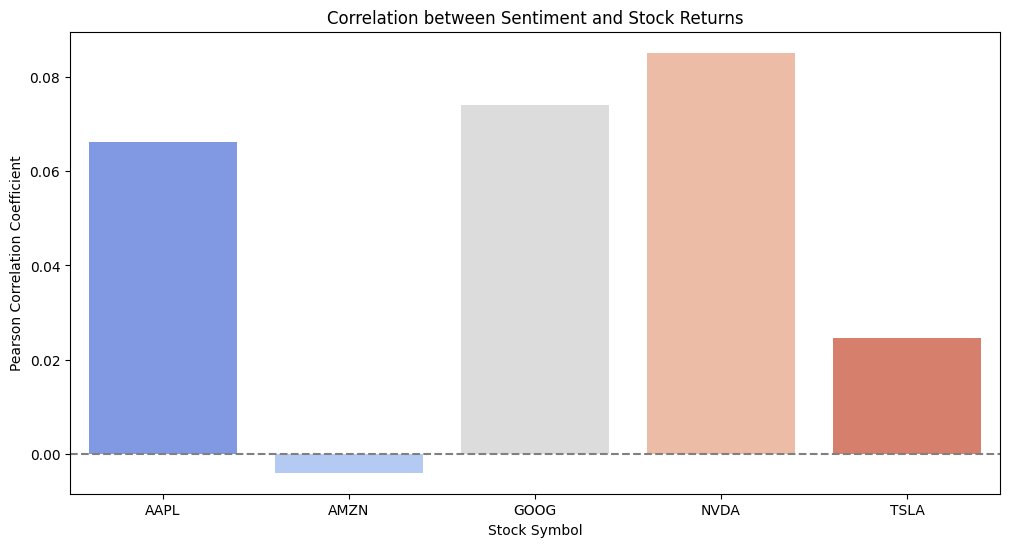

In [9]:
nsc.plot_correlation(correlation_results)

 ### Key Insight
 The bar plot illustrates the Pearson correlation coefficients, which quantify the strength and direction of the relationship between sentiment and stock performance. 
 A positive correlation indicates that higher sentiment is associated with increased stock returns, whereas a negative correlation suggests the opposite effect. 
 Notably, NVDA exhibits the strongest positive correlation, followed by AAPL and GOOG, while AMZN demonstrates a negligible correlation. 
 This visualization effectively enhances our understanding of how sentiment can impact market behavior and influence investor decisions.




### Scatter Plot of Sentiment Scores vs. Daily Stock Returns
 This plot visualizes the relationship between sentiment scores derived from news headlines and the corresponding daily stock returns. Each point represents a stock's sentiment score and its daily return, colored by stock symbol.


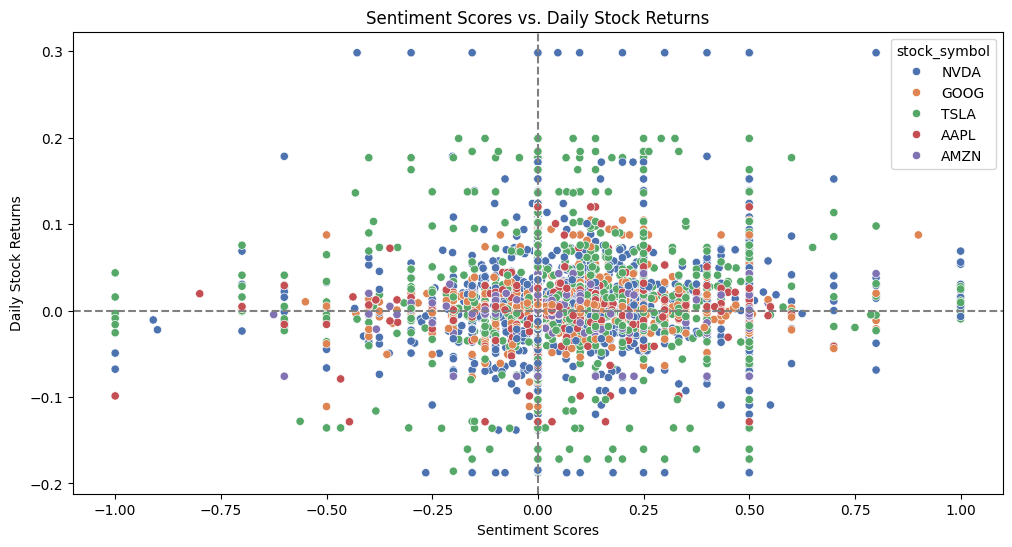

In [10]:
nsc.scatter_plot()

 ### Key Insight
 The scatter plot illustrates the relationship between sentiment scores and daily stock returns for various stocks. Each point represents a stock's sentiment score and its corresponding daily return, with colors indicating different stock symbols. 
 
 The plot reveals a diverse distribution of daily returns across sentiment scores, with no clear linear relationship. However, it is evident that stocks like NVDA and AAPL tend to cluster around higher sentiment scores, suggesting that positive sentiment may correlate with better stock performance. 
 
 Conversely, the presence of points with negative daily returns at higher sentiment scores indicates that sentiment alone may not be a reliable predictor of stock performance. This visualization emphasizes the complexity of market behavior and the need for a multifaceted approach to understanding stock movements.
